# Intorduction to Neural Network and Frameworks

Welcome to the 2 day practical session on how to run Sequence modeling. 

## What we will cover in 2 days?
Day 1: 
1. (20 mins) We will start with a quick recap on nueral network and introduce different frameworks to run the neural network.
2. (15 mins) Simple CNN example and intution behind each steps
3. (15 mins) Simple RNN exampe and intution behind each steps
4. (15 mins) Simple GAN examples and intution behind each steps

Day 2:
1. Introduction to Transformers (Encoder, Decoder, and Attention)
2. Simple example of GPT transformer models
3. Intorudction to LangChain and where the sequence modeling is trending.


## Disclaimer:
1. Not a Data Scientist or ML Engineer
2. ML enthusiast with passion towards learning
3. **Make assumptions and move forward**

## Recap on Basics


### Concepts
1. Input Layer
    a. Neurons are the input features to train.
    b. weights are the influence of each input on the outcome.
    c: Bias account for patterns not solely dictated by input data.
2. Hidden Layer
    a. Neurons are the processing steps to understand the relationship in the data
    b. weights are still the influence after each processing steps
    c: Activation functions introduces non linearity in the hidden layers (ReLU, Tanh)
3. Output Layer
    a. Neurons depends on the output format (binary, multiclass, regression)
    b. Activation function again depends on the output format  (sigmoid, softmax, linear)

### Programming Steps
1. Data preparation
    a. Data cleanup and conversions
    b. Normalize the data - Avoid feature bias, speed up optimization
    c. Arrange in vector and matrix (shape and re-shape)
    d. Split into train and test
2. Build the model
    a. Build each layer and number of neurons.
    b. define activation functions.
3. Train the model
    <ul>
    <li>Initialize the weights</li>
    <li>Forward propagation: matrix multiplication of weights and input features and apply activation function at each hidden layer. At the out layer, apply activation function to predict the output</li>
    <li>Loss functions: measure the difference between output and predictions. (MSE, Cross-entropy loss)</li>
    <li>Back propogation: Think of back propogation is a process to calulate the magnitude and direction of weight changes at each neuron to reduce the loss.</li>
    <li>Optimization function: Take the weight change calculated by back propagation and just reduce from original weight (GD) or apply difference different functions to calculate new weights (such as SGD, Adagrad, Adam)</li>
    <li>Epoch: Run the above steps n times. </li>
    </ul>
4. Evaluate the model
    a. Evalaute the model using test data.
    

## Frameworks


<table>
    <tr>
        <th>From the scratch</th>
        <th>Low level libraries</th>
        <th>API</th>
        <th>Models</th>
    </tr>
    <tr>
        <td>
            Write all the steps using your preferred programming language. 
            1. Complex
            2. Scale for large dataset
            3. Effeciecy on data handling and calculation during multiple layers
            4. Debugging
            https://github.com/Dev-Gaju/NNFS-book-with-Implementation/blob/master/README.md
        </td>
        <td>
            Low-level libraries or framework come to rescue. Tensorflow (Google), PyTorch(Meta), JAX
            Solved for scalbility, effeciency
            Reduce the complexity, but the learning curve is bit high and debugging is hard
        </td>
        <td>
            API runs on top of Low level libraries.
            Keras is one of the popular API, which we will use in demo
        </td>
        <td>
            Pre trained Models
        </td>        
    </tr>
    
    
</table>

## Handwriting recognition

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9. Our challenge - to predict which number each handwritten image represents.


## TesnorFlow Version

### Step1: Data Preparation

In [1]:
# Prepare MNIST data.
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=10000)

In [3]:
# MNIST dataset parameters
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

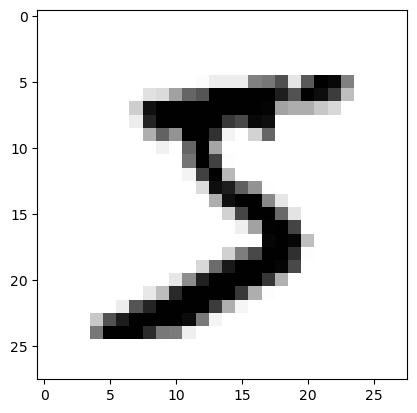

In [5]:
#Reshape the 784 values to a 28x28 image
image = x_train[0]
#plt.title('Sample: %d  Label: %d' % (num, label))
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [6]:
x_train[0][6]

array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0], dtype=uint8)

#### Step 1.a: Cleanups and numeric conversion

In [7]:
# Convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Step 1b: Normalize

In [8]:
# Normalize images value from [0, 255] to [0, 1]
x_train, x_test = x_train / 255., x_test / 255.

In [9]:
x_train[0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.14117648,
       0.36862746, 0.6039216 , 0.6666667 , 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.88235295, 0.6745098 ,
       0.99215686, 0.9490196 , 0.7647059 , 0.2509804 , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

#### Step 1c: Reshape

In [10]:
# Flatten images to 1-D vector of 784 features (28*28)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

#### Step 1e: Finalize Dataset

In [12]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [13]:
print(train_data)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(784,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>


#### Step 1.f: Create a batch and shuffle

In [14]:
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [15]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

### Step2: Build the Model

#### Step2.a: Setup training paramerters

In [ ]:
# Training parameters.
learning_rate = 0.001
training_steps = 3000
batch_size = 250
display_step = 100

# Network parameters.
n_hidden = 512 # Number of neurons.

#### Step2.c: Initialize weights

In [16]:
# A random value generator to initialize weights initially
random_normal = tf.initializers.RandomNormal()
weights = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))
}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

/Users/jegankarunakaran/anaconda3/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


#### Step2.d: Create Model functions
1. neural_net -> Forward propagation
2. cross_entropy -> Loss function
3. run_optimization -> Back propogation
4. optimizer -> Optimizer function
5. accuracy -> test function

In [17]:
# Create model. (Define Forward Propogation)
def neural_net(inputData):

    # Hidden fully connected layer with 512 neurons.
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
   
    # Apply sigmoid to hidden_layer output for non-linearity.
    hidden_layer = tf.nn.sigmoid(hidden_layer)

    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [18]:
# Define loss Function
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [19]:
# Define what optimizer function is used
optimizer = tf.keras.optimizers.SGD(learning_rate)


In [20]:
# Back propagation function
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [21]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

#### Step3: Train the Model

run_optimization for specific ephocs

In [22]:
# Test one Batch
# ds = train_data.take(1)
# for ds_x, ds_y in ds:
#     with tf.GradientTape() as g:
#         pred = neural_net(ds_x)
#         loss = cross_entropy(pred, ds_y)
        
# # Variables to update, i.e. trainable variables.
#     trainable_variables = list(weights.values()) + list(biases.values())
#     gradients = g.gradient(loss, trainable_variables)
#     optimizer.apply_gradients(zip(gradients, trainable_variables))


In [23]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" % (step, loss, acc))

2024-02-17 12:46:20.216424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [60000]
	 [[{{node Placeholder/_1}}]]
2024-02-17 12:46:20.216580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [60000]
	 [[{{node Placeholder/_1}}]]


Training epoch: 100, Loss: 175.971466, Accuracy: 0.840000
Training epoch: 200, Loss: 117.992096, Accuracy: 0.880000
Training epoch: 300, Loss: 118.265350, Accuracy: 0.880000
Training epoch: 400, Loss: 90.383102, Accuracy: 0.876000
Training epoch: 500, Loss: 87.996490, Accuracy: 0.908000
Training epoch: 600, Loss: 94.543427, Accuracy: 0.896000
Training epoch: 700, Loss: 61.631683, Accuracy: 0.916000
Training epoch: 800, Loss: 90.040985, Accuracy: 0.892000
Training epoch: 900, Loss: 74.013123, Accuracy: 0.916000
Training epoch: 1000, Loss: 77.970261, Accuracy: 0.924000
Training epoch: 1100, Loss: 64.252106, Accuracy: 0.940000
Training epoch: 1200, Loss: 69.006386, Accuracy: 0.920000
Training epoch: 1300, Loss: 79.784187, Accuracy: 0.912000
Training epoch: 1400, Loss: 83.230927, Accuracy: 0.900000
Training epoch: 1500, Loss: 64.665886, Accuracy: 0.928000
Training epoch: 1600, Loss: 60.908890, Accuracy: 0.932000
Training epoch: 1700, Loss: 60.514694, Accuracy: 0.940000
Training epoch: 1800

In [24]:
# Test model on validation set.
pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.933500


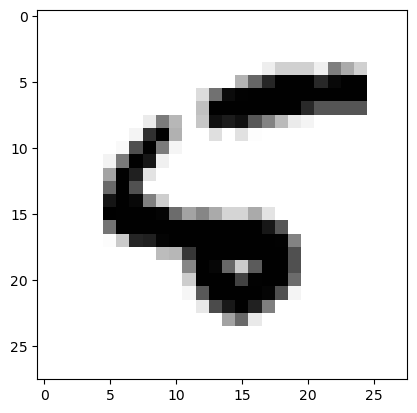

Original Labels: 5
Model prediction: 6


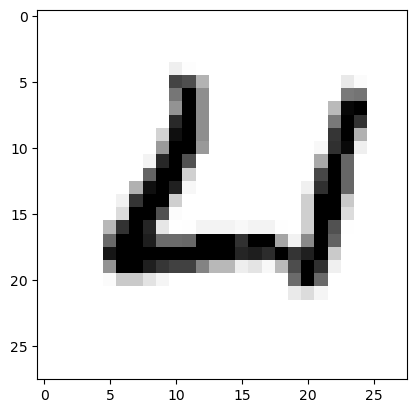

Original Labels: 4
Model prediction: 6


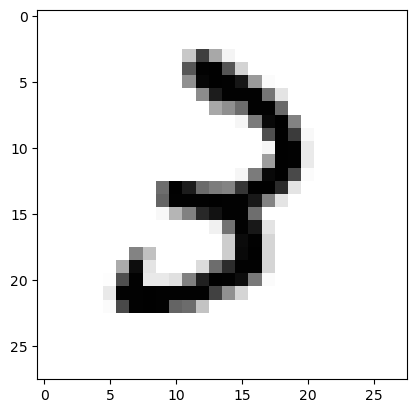

Original Labels: 3
Model prediction: 2


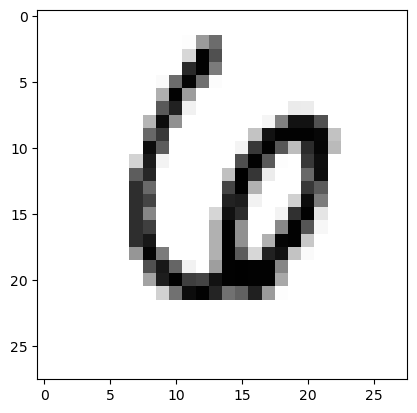

Original Labels: 6
Model prediction: 2


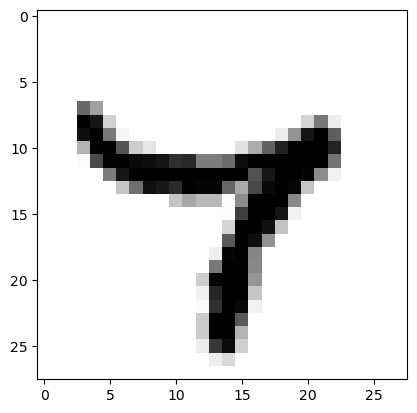

Original Labels: 7
Model prediction: 4


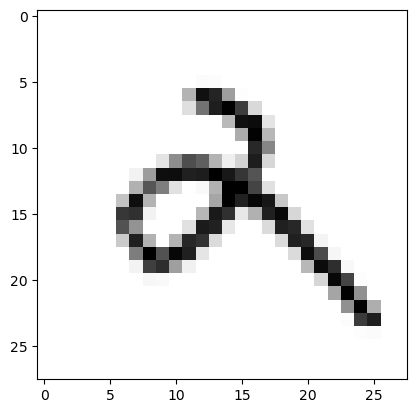

Original Labels: 2
Model prediction: 9


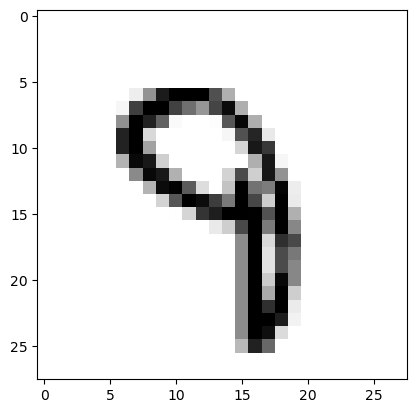

Original Labels: 9
Model prediction: 3


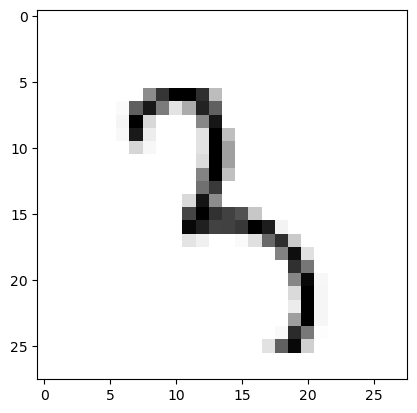

Original Labels: 3
Model prediction: 5


In [25]:
n_images = 200
test_images = x_test[:n_images]
test_labels = y_test[:n_images]
predictions = neural_net(test_images)

for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    if (model_prediction != test_labels[i]):
        plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray_r')
        plt.show()
        print("Original Labels: %i" % test_labels[i])
        print("Model prediction: %i" % model_prediction)